# 分组与聚合

* GroupBy对象

In [1]:
import pandas as pd
import numpy as np

In [61]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                            'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
df

A      B         C         D
0  foo    one -0.527734 -0.031381
1  bar    one -0.198668 -0.849724
2  foo    two  1.541103  1.186877
3  bar  three  1.590023  1.487310
4  foo    two  1.212341 -1.679589
5  bar    two -0.125511  1.110535
6  foo    one  0.852693 -0.631104
7  foo  three -1.333103  0.989434

In [7]:
df.groupby('A',as_index=True)    # groupby是一个分组对象，分组之后并不是直接产生结果的

In [11]:
df.groupby('A',as_index=False).sum()    # 分组后的聚合是对每一组进行聚合  

A         C         D
0  bar -0.813530 -1.682979
1  foo -2.071223 -3.836994

In [9]:
df.groupby('A',as_index=False).sum().index

Int64Index([0, 1], dtype='int64')

In [10]:
df.groupby('A').sum()

C         D
A                      
bar -0.813530 -1.682979
foo -2.071223 -3.836994

In [5]:
df.groupby('A').sum().shape


(2, 2)

In [12]:
df.groupby('A').size()

A
bar    3
foo    5
dtype: int64

In [8]:
df.groupby(['A','B']).sum()   

C         D
A   B                        
bar one   -0.984471 -0.043672
    three -1.429510  1.017294
    two   -0.692597 -0.970318
foo one    1.348252  0.953936
    three -1.678742 -0.110585
    two   -0.039560 -0.730062

In [13]:
df.groupby(['A','B']).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [15]:
df

A      B         C         D
0  foo    one -1.566378 -0.767842
1  bar    one -0.925767  0.997244
2  foo    two  0.334522 -3.222793
3  bar  three -0.077704 -2.128931
4  foo    two -1.011080 -0.997273
5  bar    two  0.189941 -0.551293
6  foo    one  0.462063  0.030302
7  foo  three -0.290350  1.120612

In [16]:
# 按自定义key分组，列表
self_def_key = [1, 1, 2, 2, 2, 1, 1, 1]
df.groupby(self_def_key).mean()

C         D
1 -0.426098  0.165805
2 -0.251420 -2.116332

In [17]:
# 按自定义key分组，多层列表
df.groupby([df['A'], df['B']]).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [19]:
df.groupby([df['A'], df['B']]).mean()

C         D
A   B                        
bar one   -0.925767  0.997244
    three -0.077704 -2.128931
    two    0.189941 -0.551293
foo one   -0.552157 -0.368770
    three -0.290350  1.120612
    two   -0.338279 -2.110033

In [20]:
df.groupby([df['A'], df['B']]).mean().unstack()   

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.925767 -0.077704  0.189941  0.997244 -2.128931 -0.551293
foo -0.552157 -0.290350 -0.338279 -0.368770  1.120612 -2.110033

* GroupBy对象分组迭代  
groupBy对象是一个可迭代的对象   

可以遍历，也可以转成列表

In [21]:
# 单层分组
grouped1 = df.groupby('A')
for group_name, group_data in grouped1:
    print('---',group_name)
    print('***',group_data)

--- bar
***      A      B         C         D
1  bar    one -0.925767  0.997244
3  bar  three -0.077704 -2.128931
5  bar    two  0.189941 -0.551293
--- foo
***      A      B         C         D
0  foo    one -1.566378 -0.767842
2  foo    two  0.334522 -3.222793
4  foo    two -1.011080 -0.997273
6  foo    one  0.462063  0.030302
7  foo  three -0.290350  1.120612


In [22]:
# 多层分组
grouped2 = df.groupby(['A', 'B'])
for group_name, group_data in grouped2:
    print('---',group_name)
    print('***',group_data)

--- ('bar', 'one')
***      A    B         C         D
1  bar  one -0.925767  0.997244
--- ('bar', 'three')
***      A      B         C         D
3  bar  three -0.077704 -2.128931
--- ('bar', 'two')
***      A    B         C         D
5  bar  two  0.189941 -0.551293
--- ('foo', 'one')
***      A    B         C         D
0  foo  one -1.566378 -0.767842
6  foo  one  0.462063  0.030302
--- ('foo', 'three')
***      A      B        C         D
7  foo  three -0.29035  1.120612
--- ('foo', 'two')
***      A    B         C         D
2  foo  two  0.334522 -3.222793
4  foo  two -1.011080 -0.997273


In [23]:
# GroupBy对象转换list，凡是可迭代对象都可以转换成列表
list(grouped1)

[('bar',      A      B         C         D
  1  bar    one -0.925767  0.997244
  3  bar  three -0.077704 -2.128931
  5  bar    two  0.189941 -0.551293), ('foo',      A      B         C         D
  0  foo    one -1.566378 -0.767842
  2  foo    two  0.334522 -3.222793
  4  foo    two -1.011080 -0.997273
  6  foo    one  0.462063  0.030302
  7  foo  three -0.290350  1.120612)]

In [24]:
# GroupBy对象转换dict
dict(list(grouped1))

{'bar':      A      B         C         D
 1  bar    one -0.925767  0.997244
 3  bar  three -0.077704 -2.128931
 5  bar    two  0.189941 -0.551293, 'foo':      A      B         C         D
 0  foo    one -1.566378 -0.767842
 2  foo    two  0.334522 -3.222793
 4  foo    two -1.011080 -0.997273
 6  foo    one  0.462063  0.030302
 7  foo  three -0.290350  1.120612}

In [25]:
# 按列分组
print(df.dtypes)

# 按数据类型分组
print(df.groupby(df.dtypes, axis=1).size())
df.groupby(df.dtypes, axis=1).sum()

A     object
B     object
C    float64
D    float64
dtype: object
float64    2
object     2
dtype: int64


float64    object
0 -2.334220    fooone
1  0.071477    barone
2 -2.888271    footwo
3 -2.206634  barthree
4 -2.008353    footwo
5 -0.361352    bartwo
6  0.492366    fooone
7  0.830262  foothree

* 其他分组方法

In [26]:
df2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
df2.iloc[1, 1:4] = np.NaN
df2

a    b    c    d  e
A  1  7.0  8.0  8.0  4
B  7  NaN  NaN  NaN  2
C  9  5.0  2.0  8.0  9
D  4  4.0  8.0  7.0  3
E  4  2.0  8.0  9.0  5

In [27]:
# 通过字典分组
mapping_dict = {'a':'python', 'b':'python', 'c':'java', 'd':'C', 'e':'java'}
print(df2.groupby(mapping_dict, axis=1).size())
print(df2.groupby(mapping_dict, axis=1).count()) # 非NaN的个数
df2.groupby(mapping_dict, axis=1).sum()

C         1
java      2
python    2
dtype: int64
   C  java  python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2


C  java  python
A  8.0  12.0     8.0
B  NaN   2.0     7.0
C  8.0  11.0    14.0
D  7.0  11.0     8.0
E  9.0  13.0     6.0

In [28]:
# 通过函数分组
df3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['AA', 'BBB', 'CC', 'D', 'EE'])
print(df3)

def group_key(idx):
    """
        idx 为列索引或行索引
    """
    #return idx
    return len(idx)

list(df3.groupby(group_key))

     a  b  c  d  e
AA   8  5  9  4  8
BBB  3  2  3  7  6
CC   4  2  9  5  2
D    4  1  2  5  2
EE   3  2  2  7  6


[(1,    a  b  c  d  e
  D  4  1  2  5  2), (2,     a  b  c  d  e
  AA  8  5  9  4  8
  CC  4  2  9  5  2
  EE  3  2  2  7  6), (3,      a  b  c  d  e
  BBB  3  2  3  7  6)]

In [32]:
# 以上自定义函数等价于
df3.groupby(len).size()

1    1
2    3
3    1
dtype: int64

In [33]:
# 通过索引级别分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']], names=['language', 'index'])
df4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
df4

language Python Java Python Java Python
index         A    A      B    C      B
0             3    8      7    9      8
1             1    2      2    1      6
2             6    2      4    1      2
3             2    5      7    7      4
4             5    5      7    2      7

In [35]:
# 根据language进行分组
df4.groupby(level='language', axis=1).sum()
df4.groupby(level='index', axis=1).sum()

index   A   B  C
0      11  15  9
1       3   8  1
2       8   6  1
3       7  11  7
4      10  14  2

* 聚合

In [36]:
df

A      B         C         D
0  foo    one -1.566378 -0.767842
1  bar    one -0.925767  0.997244
2  foo    two  0.334522 -3.222793
3  bar  three -0.077704 -2.128931
4  foo    two -1.011080 -0.997273
5  bar    two  0.189941 -0.551293
6  foo    one  0.462063  0.030302
7  foo  three -0.290350  1.120612

In [38]:
# 内置的聚合函数
df.groupby('A').describe().T

A             bar       foo
C count  3.000000  5.000000
  mean  -0.271177 -0.414245
  std    0.582473  0.869992
  min   -0.925767 -1.566378
  25%   -0.501735 -1.011080
  50%   -0.077704 -0.290350
  75%    0.056118  0.334522
  max    0.189941  0.462063
D count  3.000000  5.000000
  mean  -0.560993 -0.767399
  std    1.563110  1.603333
  min   -2.128931 -3.222793
  25%   -1.340112 -0.997273
  50%   -0.551293 -0.767842
  75%    0.222976  0.030302
  max    0.997244  1.120612

In [52]:
# 自定义聚合函数   
def peak_range(df):
    """
        返回数值范围
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()

print(df.groupby('A').agg(peak_range))
print(df.groupby('A').agg(lambda df : df.max() - df.min()))    # agg传进去的一定要是reduce相关函数

            C         D
A                      
bar  1.115708  3.126175
foo  2.028442  4.343405
            C         D
A                      
bar  1.115708  3.126175
foo  2.028442  4.343405


In [72]:
# 应用多个聚合函数

# 同时应用多个聚合函数
df.groupby('A').agg(['mean', 'std', 'count', peak_range]) # 默认列名为函数名

C                                    D                           
         mean       std count peak_range      mean       std count peak_range
A                                                                            
bar  0.421948  1.012244     3   1.788691  0.582707  1.254744     3   2.337033
foo  0.349060  1.226612     5   2.874206 -0.033153  1.183476     5   2.866467

In [54]:
df.groupby('A').agg(['mean', 'std', 'count', ('range', peak_range)]) # 通过元组提供新的列名

C                                   D                          
         mean       std count     range      mean       std count     range
A                                                                          
bar -0.271177  0.582473     3  1.115708 -0.560993  1.563110     3  3.126175
foo -0.414245  0.869992     5  2.028442 -0.767399  1.603333     5  4.343405

In [55]:
# 每列作用不同的聚合函数
dict_mapping = {'C':'mean',
                'D':'sum'}
df.groupby('A').agg(dict_mapping)

C         D
A                      
bar -0.271177 -1.682979
foo -0.414245 -3.836994

In [56]:
dict_mapping = {'C':['mean','max'],
                'D':'sum'}
df.groupby('A').agg(dict_mapping)

C                   D
         mean       max       sum
A                                
bar -0.271177  0.189941 -1.682979
foo -0.414245  0.462063 -3.836994

Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Brand, dtype: int64


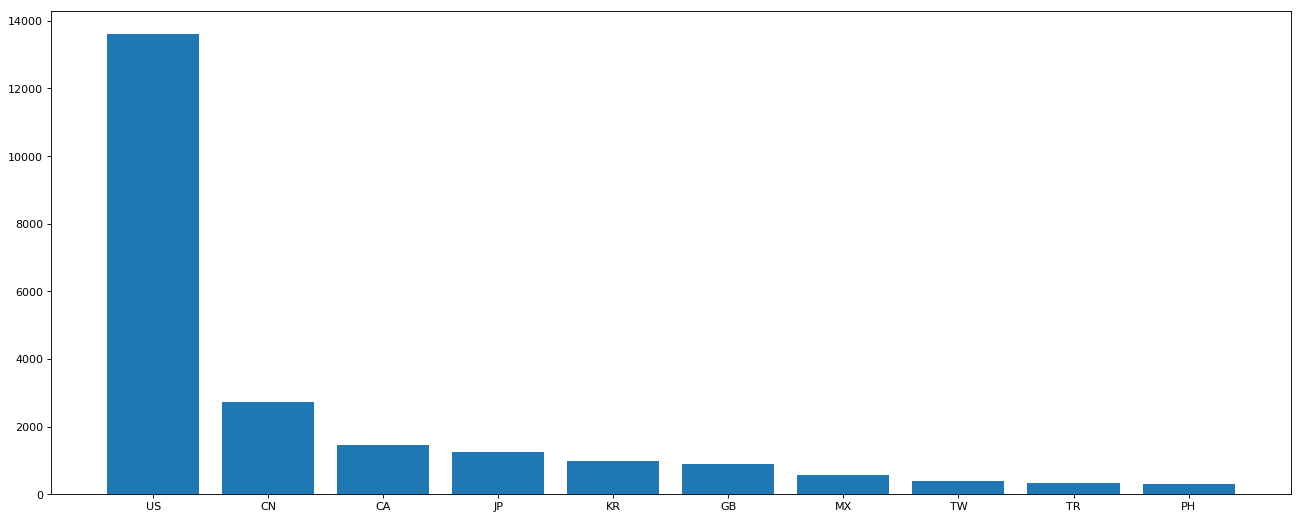

In [57]:
# coding=utf-8
import pandas as pd
from matplotlib import pyplot as plt

file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)

#使用matplotlib呈现出店铺总数排名前10的国家
#准备数据
data1 = df.groupby(by="Country").count()["Brand"].sort_values(ascending=False)[:10]
print(data1)
_x = data1.index
_y = data1.values

#画图 
plt.figure(figsize=(20,8),dpi=80)

plt.bar(range(len(_x)),_y)

plt.xticks(range(len(_x)),_x)

plt.show()